In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_path = 'images/cycle.jpg'
img_path

'images/cycle.jpg'

In [3]:
img = plt.imread(img_path)
img.shape

(1600, 2560, 3)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]

In [5]:
kernel = np.ones((10,10), np.uint8)

In [6]:
rgb_erosion = cv2.erode(img, kernel, iterations=1) 

In [7]:
bin_erosion = cv2.erode(binary, kernel, iterations=1) 

In [8]:
rgb_dilation = cv2.dilate(img, kernel, iterations=1) 

In [9]:
bin_dilation = cv2.dilate(binary, kernel, iterations=1) 

In [10]:
def plot_img(img_set, title_set):
    n = len(img_set)
    plt.figure(figsize = (20, 30))
    for i in range(n):
        img = img_set[i]
        ch = len(img.shape)

        plt.subplot(4, 2, i + 1)
        if (ch == 3):
            plt.imshow(img_set[i])
        else:
            plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])
    plt.savefig('./Output.png')

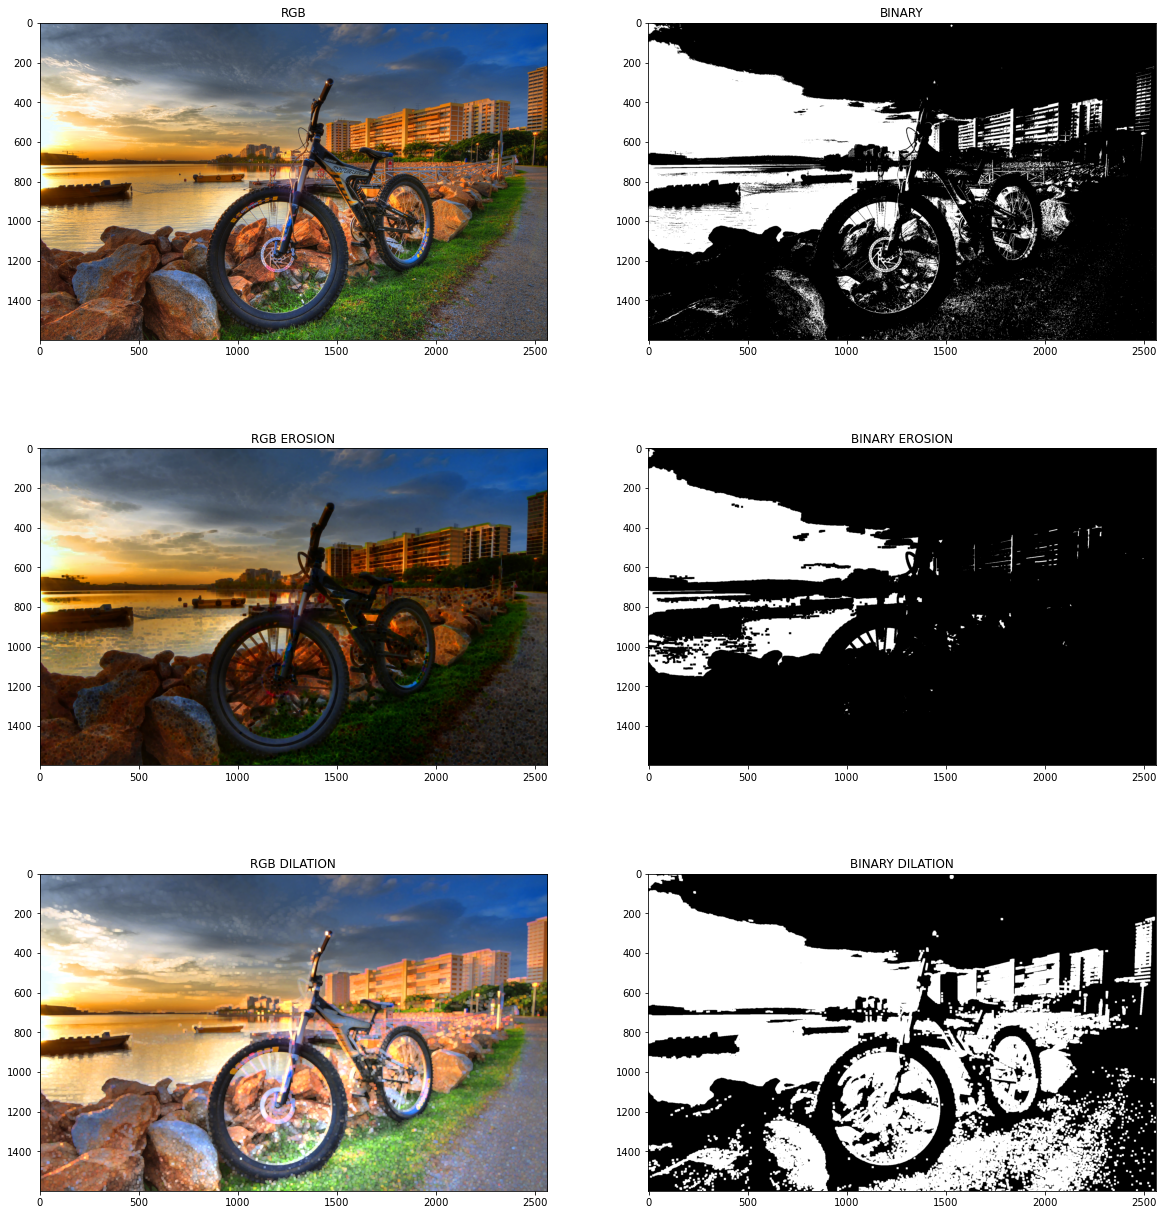

In [11]:
img_set = [img, binary, rgb_erosion, bin_erosion, rgb_dilation, bin_dilation]
title_set = ['RGB', 'BINARY','RGB EROSION', 'BINARY EROSION','RGB DILATION', 'BINARY DILATION']
plot_img(img_set, title_set)